In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt             
import numpy as np

In [5]:
df2 = pd.read_csv('comunasComas.csv',encoding='latin1')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   region    86 non-null     object
 1   comunas   86 non-null     object
 2   P1        86 non-null     object
 3   P2        86 non-null     object
 4   P3        86 non-null     object
 5   EJH       86 non-null     object
 6   ICE       86 non-null     object
 7   CPF       86 non-null     object
 8   EST       86 non-null     object
 9   PM        86 non-null     object
 10  PI        86 non-null     object
 11  Tramo 40  86 non-null     object
 12  SA        86 non-null     object
 13  AR        86 non-null     object
 14  PO        86 non-null     object
 15  OCP       86 non-null     object
 16  IDC       86 non-null     object
 17  HM        86 non-null     object
dtypes: object(18)
memory usage: 12.2+ KB


In [3]:
# Leer el archivo CSV original
df = pd.read_csv('comunasComas.csv',encoding='latin1')
#df.info()
# Reemplazar comas por puntos en todas las columnas de tipo string
df = df.apply(lambda x: x.str.replace(',', '.') if x.dtype == "object" else x)
# 
# Guardar el resultado en un nuevo archivo CSV
df.to_csv('comunas.csv', index=False)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   region    86 non-null     object
 1   comunas   86 non-null     object
 2   P1        86 non-null     object
 3   P2        86 non-null     object
 4   P3        86 non-null     object
 5   EJH       86 non-null     object
 6   ICE       86 non-null     object
 7   CPF       86 non-null     object
 8   EST       86 non-null     object
 9   PM        86 non-null     object
 10  PI        86 non-null     object
 11  Tramo 40  86 non-null     object
 12  SA        86 non-null     object
 13  AR        86 non-null     object
 14  PO        86 non-null     object
 15  OCP       86 non-null     object
 16  IDC       86 non-null     object
 17  HM        86 non-null     object
dtypes: object(18)
memory usage: 12.2+ KB


In [4]:
df.describe()

,P1,P2,P3,EJH,ICE,CPF,EST,PM,PI,Tramo 40,SA,AR,PO,OCP,IDC,HM
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.209302,0.077093,0.716744,8.641860,-0.271744,0.432149,0.747791,0.300733,0.196502,0.650566,0.205449,0.376107,0.181580,0.417216,0.334224,0.092343
std,0.113332,0.041013,0.102938,1.193656,0.742646,0.247336,0.053631,0.114168,0.077800,0.079189,0.189031,0.234249,0.209063,0.139049,0.106223,0.017317
min,0.010000,0.030000,0.480000,6.500000,-1.130000,0.001500,0.470000,0.109500,0.072700,0.483900,0.000800,0.000900,0.006600,0.142500,0.158400,0.047600
25%,0.122500,0.050000,0.650000,7.800000,-0.710000,0.244800,0.720000,0.221350,0.142350,0.598200,0.025075,0.184975,0.019325,0.321700,0.258250,0.081525
50%,0.205000,0.070000,0.720000,8.400000,-0.480000,0.442450,0.750000,0.285850,0.184300,0.655000,0.198200,0.375400,0.063300,0.402150,0.311300,0.091800
75%,0.290000,0.100000,0.777500,9.000000,-0.005000,0.597325,0.780000,0.354275,0.240675,0.700175,0.324725,0.575450,0.286875,0.474950,0.405700,0.101900
max,0.470000,0.300000,0.920000,12.500000,2.880000,0.999000,0.850000,0.607300,0.416000,0.820200,0.663200,1.000000,0.798500,0.755400,0.640000,0.137700


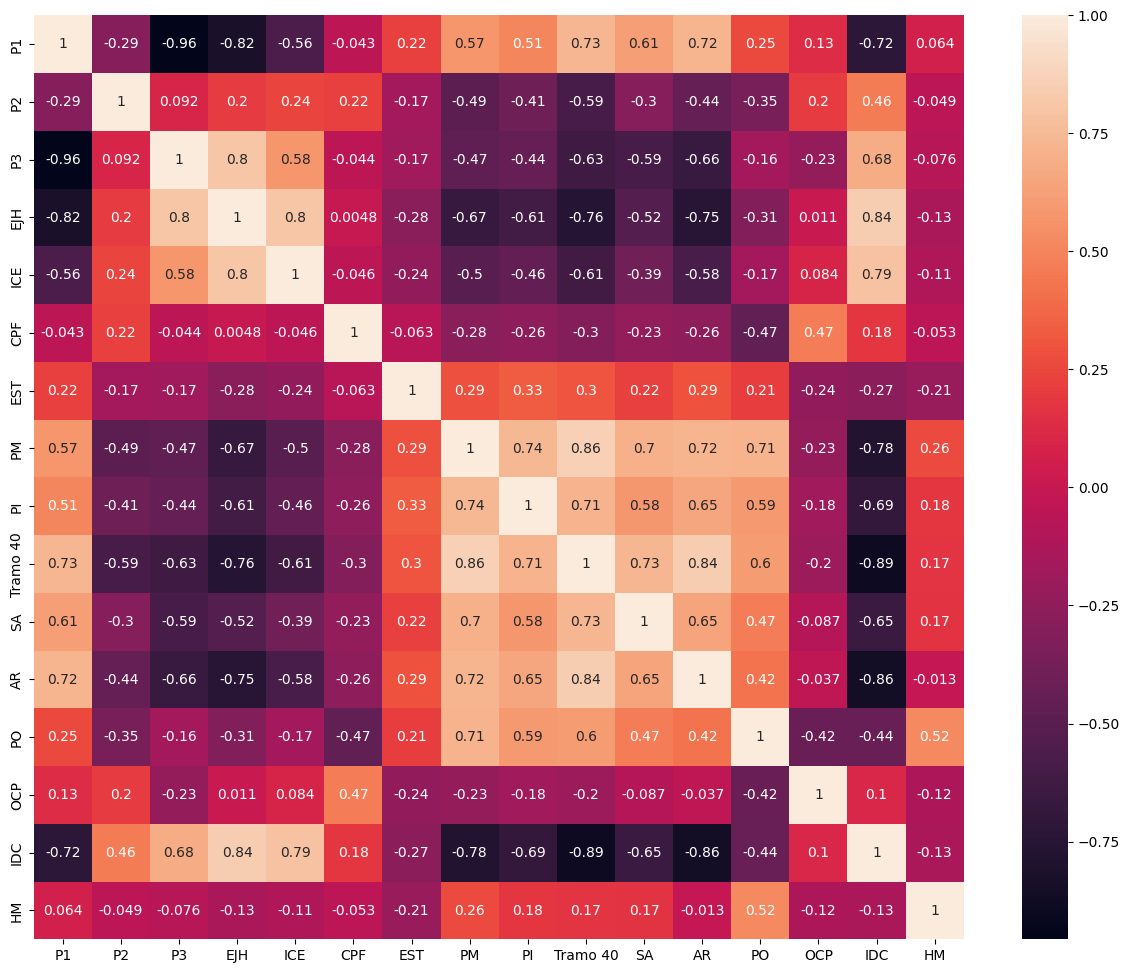

In [6]:
df = pd.read_csv('comunas.csv',encoding='latin1')
df = df.drop(['region', 'comunas'], axis=1)

coef = df.corr(method='pearson')
plt.figure(figsize=(15,12))
sns.heatmap(coef,annot=True)
plt.show()

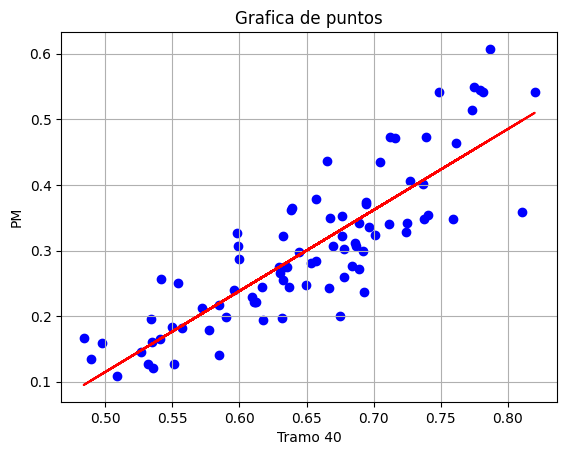

In [9]:
x = df["Tramo 40"]
y = df["PM"]

plt.scatter(x,y,color='blue')

coef = np.polyfit(x,y,1)
polinomio = np.poly1d(coef)
plt.plot(x,polinomio(x),color = 'red',label = "Linea")

plt.title('Grafica de puntos')
plt.xlabel('Tramo 40')
plt.ylabel('PM')

plt.grid(True)
plt.show()

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

#Obteniendo los datos
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


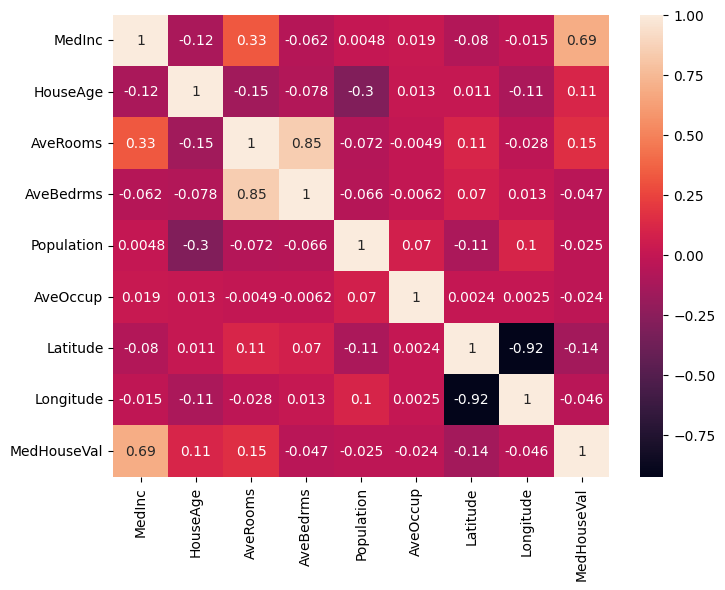

In [6]:
coef = data.corr(method='pearson')
plt.figure(figsize=(8,6))
sns.heatmap(coef,annot=True)
plt.show()

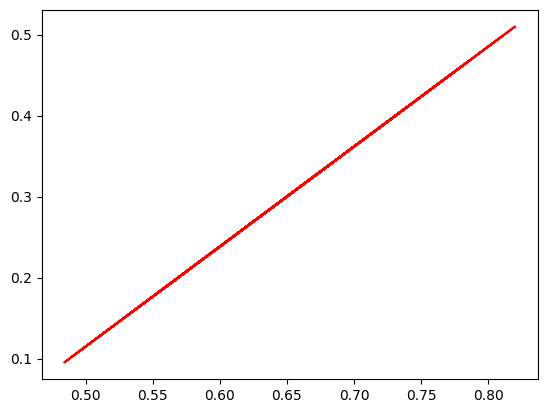

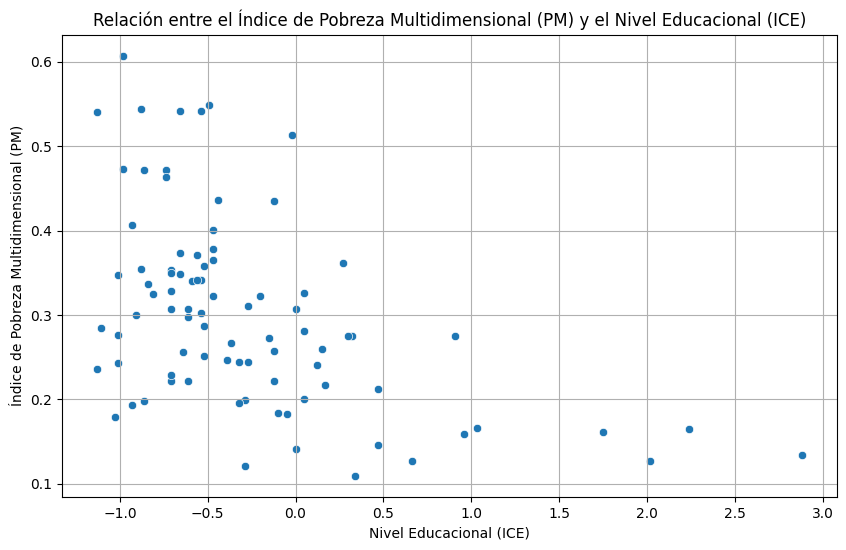

La correlación entre PM e ICE es: -0.5008170450336776


In [10]:
df['PM'] = df['PM'].astype(str).str.replace(',', '.').astype(float)
df['ICE'] = df['ICE'].astype(str).str.replace(',', '.').astype(float)



coef = np.polyfit(x,y,1)
polinomio = np.poly1d(coef)
plt.plot(x,polinomio(x),color = 'red',label = "Linea")
correlacion = df['ICE'].corr(df['PM'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ICE', y='PM', data=df)
plt.title('Relación entre el Índice de Pobreza Multidimensional (PM) y el Nivel Educacional (ICE)')
plt.xlabel('Nivel Educacional (ICE)')
plt.ylabel('Índice de Pobreza Multidimensional (PM)')
plt.grid(True)
plt.show()



print(f'La correlación entre PM e ICE es: {correlacion}')

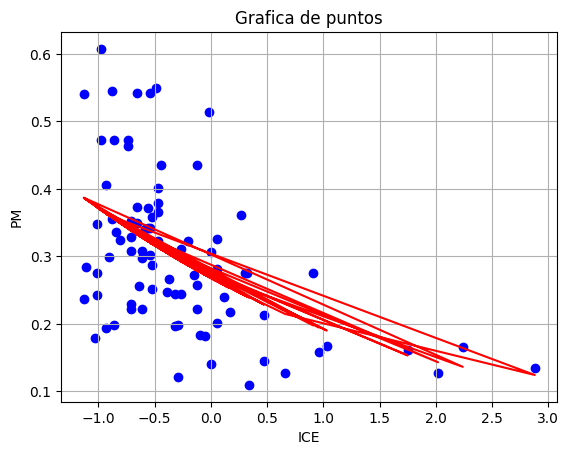

In [13]:
x = df["ICE"]
y = df["PM"]

plt.scatter(x,y,color='blue')

coef = np.polyfit(x,y,2)
polinomio = np.poly1d(coef)
plt.plot(x,polinomio(x),color = 'red',label = "Linea")

plt.title('Grafica de puntos')
plt.xlabel('ICE')
plt.ylabel('PM')

plt.grid(True)
plt.show()

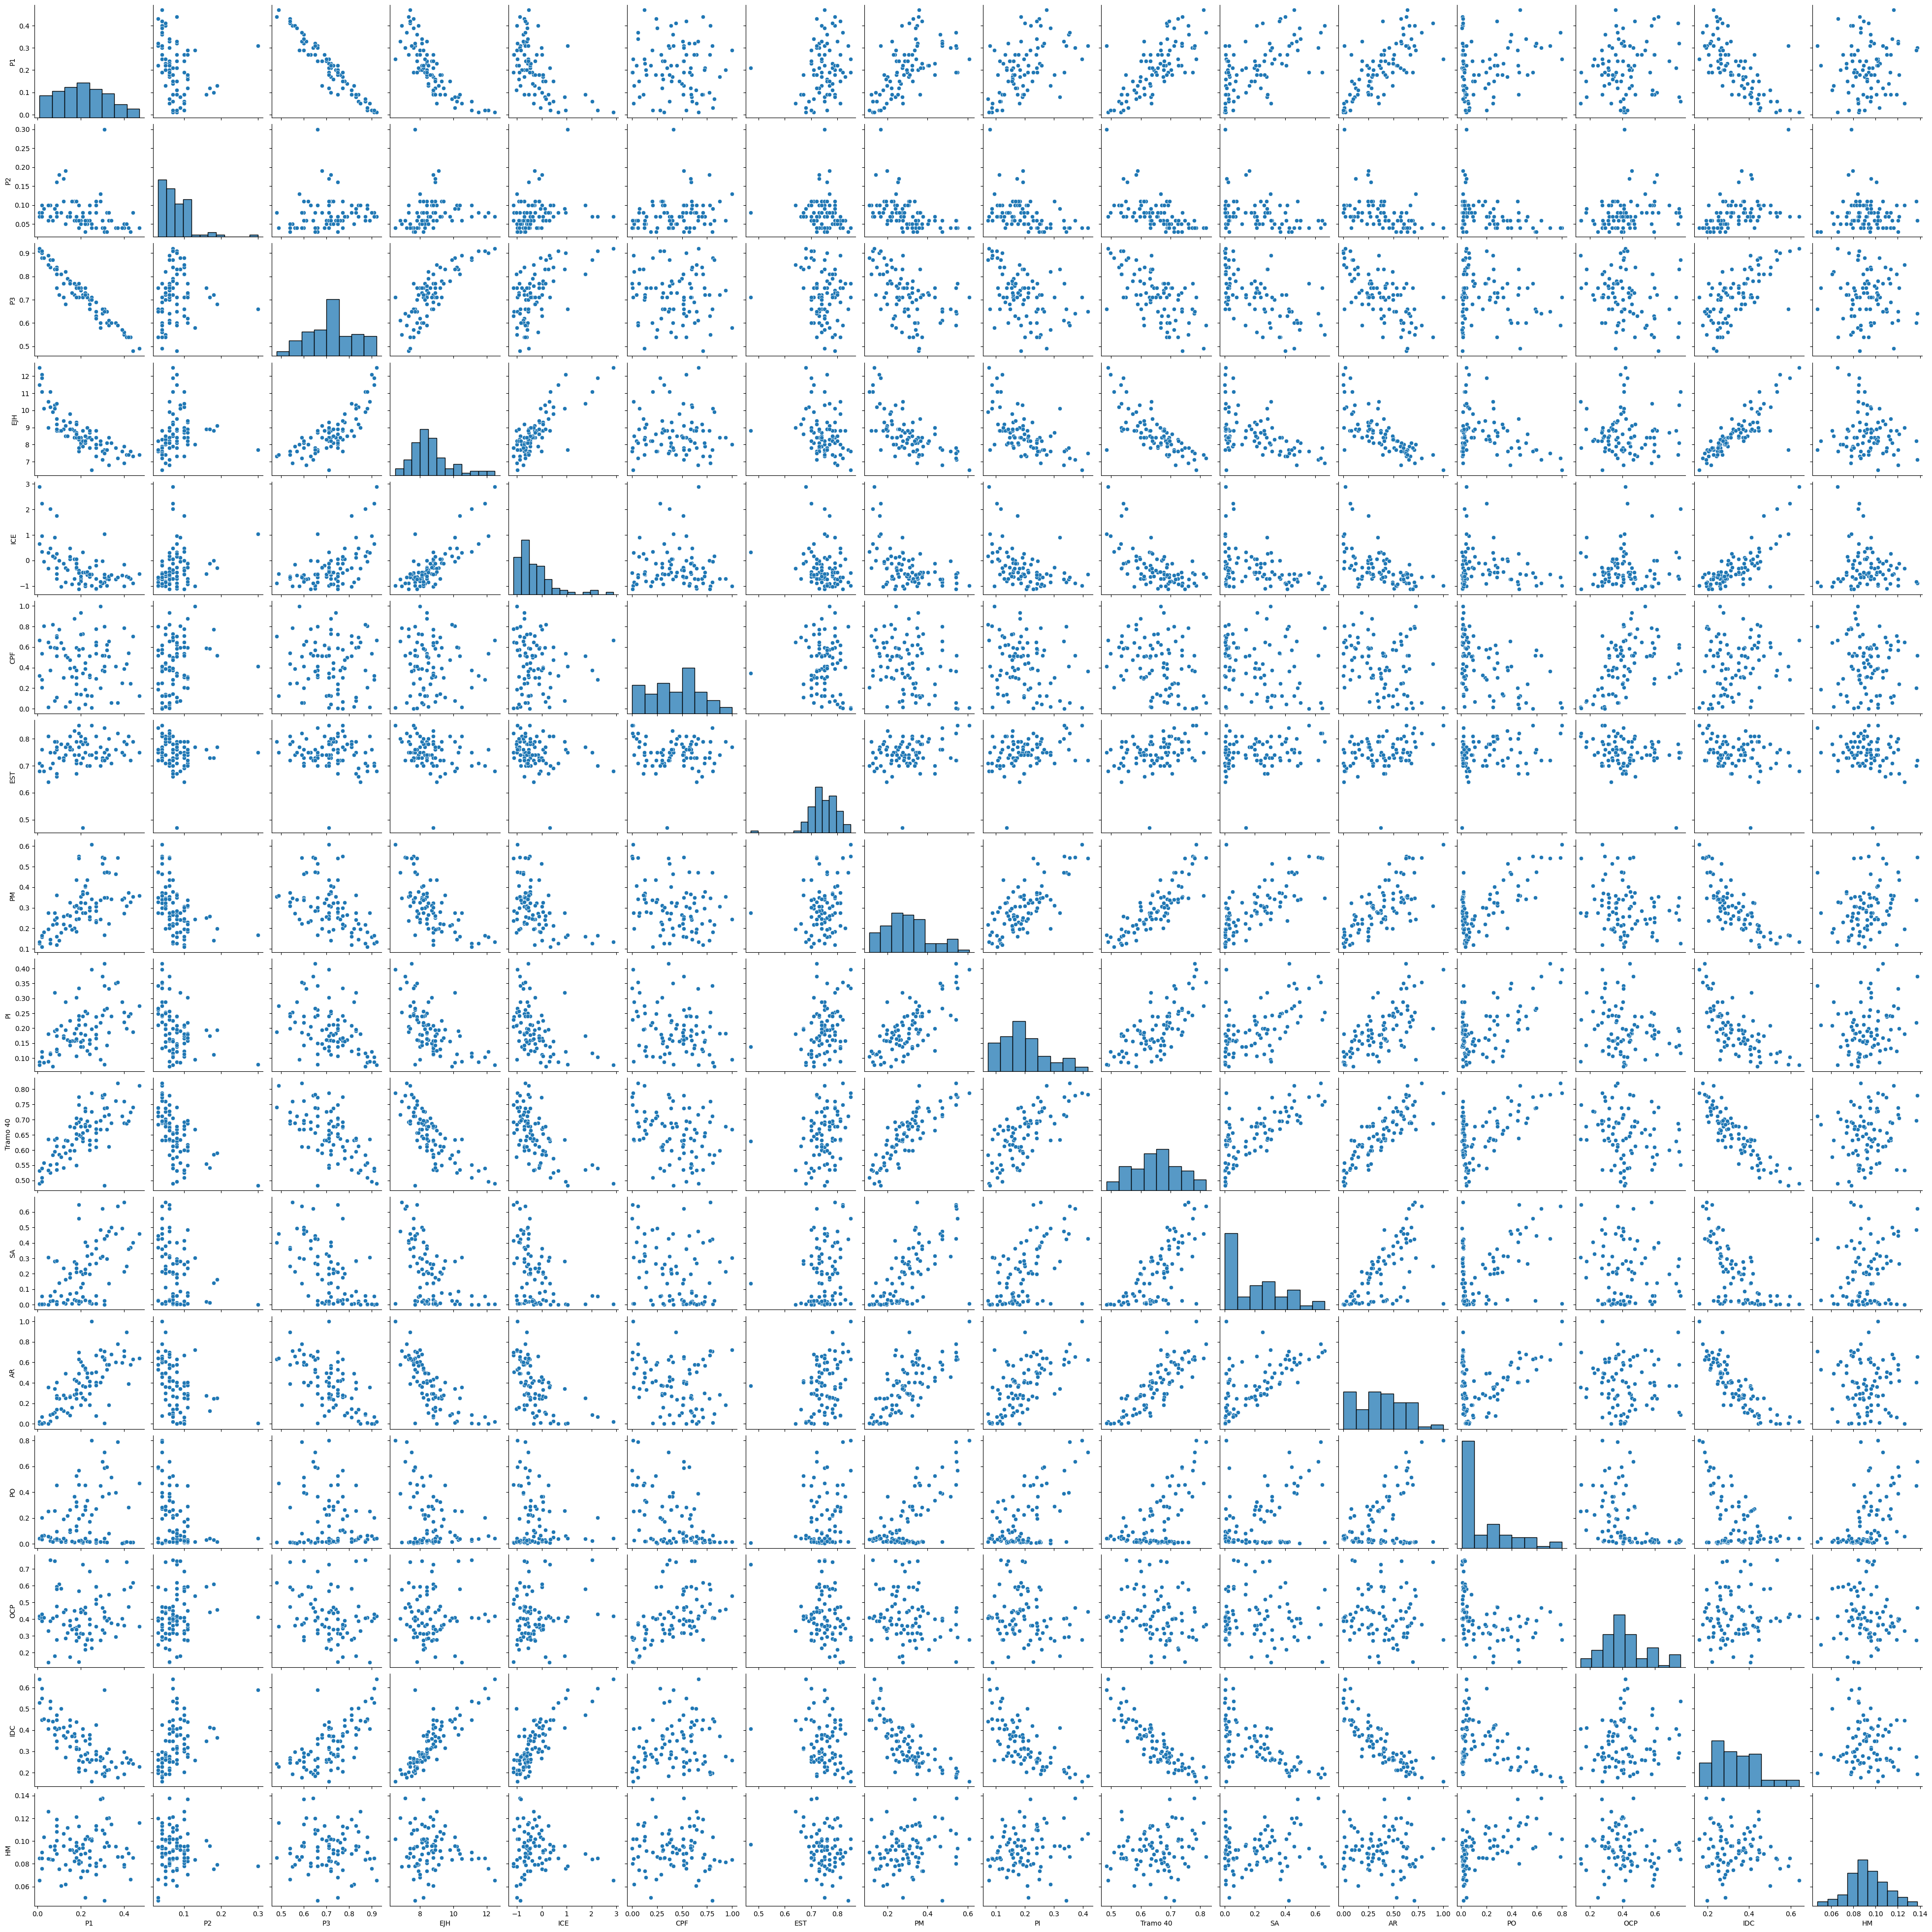

In [10]:
import seaborn as sns

sns.pairplot(df)

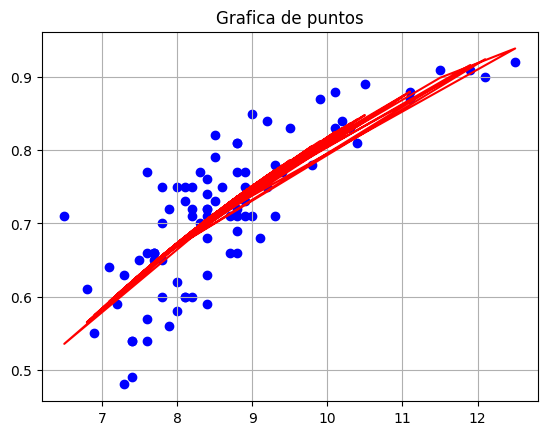

In [15]:
x = df["EJH"]
y = df["P3"]

plt.scatter(x,y,color='blue')

coef = np.polyfit(x,y,2)
polinomio = np.poly1d(coef)
plt.plot(x,polinomio(x),color = 'red',label = "Linea")

plt.title('Grafica de puntos')
plt.xlabel('')
plt.ylabel('')

plt.grid(True)
plt.show()

In [ ]:
HM = [0.0813, 0.0476, 0.0822, 0.0775, 0.0856, 0.0836, 0.0781, 0.0972, 
 0.0792, 0.0936, 0.0681, 0.0986, 0.0842, 0.0913, 0.0921, 0.0864, 
 0.1101, 0.0738, 0.0806, 0.0662, 0.0792, 0.1018, 0.0622, 0.0854, 
 0.0755, 0.09, 0.0849, 0.0654, 0.1131, 0.0954, 0.1191, 0.0735, 
 0.0901, 0.1085, 0.1006, 0.1137, 0.1118, 0.0888, 0.1262, 0.102, 
 0.0959, 0.0706, 0.1035, 0.0503, 0.0791, 0.0759, 0.0608, 0.0989, 
 0.0883, 0.0782, 0.0949, 0.0837, 0.0923, 0.0829, 0.0923, 0.094, 
 0.1204, 0.0937, 0.0955, 0.0891, 0.1095, 0.1019, 0.0957, 0.0747, 
 0.1007, 0.1066, 0.1202, 0.1377, 0.1012, 0.0892, 0.1065, 0.1039, 
 0.0844, 0.0915, 0.1213, 0.0851, 0.0803, 0.0956, 0.1162, 0.0854, 
 0.0958, 0.1019, 0.1134, 0.115, 0.0863, 0.1367]

HM.describe()
